<a href="https://colab.research.google.com/github/3atom1take1/kaggle/blob/master/deploy_190405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab設定

In [0]:
# ドライブのファイルを読み書きするためのライブラリ
import google.colab
import googleapiclient.discovery
import googleapiclient.http

google.colab.auth.authenticate_user()
drive_service = googleapiclient.discovery.build('drive','v3')

# AUTH認証が必要

In [219]:
# 事前にフォルダにkaggle.jsonをアップロードしておく必要あり
from google.colab import files
!more kaggle.json
# kaggle.jsonをアップロードする

{"username":"fivesigma","key":"5a0c1ef9bd7c94b2f0fb1d77429dc584"}


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [221]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# kaggle APIキーを打ち込む（コンペごとに異なる）
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 47.1MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.05MB/s]


In [0]:
!mkdir input

mkdir: cannot create directory ‘input’: File exists
mkdir: cannot create directory ‘output’: File exists


In [0]:
!mv train.csv input
!mv test.csv input

# 前処理

In [0]:
# 基本ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [0]:
train_path = './input/train.csv'
test_path = './input/test.csv'

In [0]:
df_train = pd.read_csv(train_path , encoding = 'utf-8')
df_test = pd.read_csv(test_path , encoding = 'utf-8')
df_source = pd.concat([df_train, df_test])

In [226]:
print('df_train:',df_train.shape)
print('df_test:',df_test.shape)

df_train: (891, 12)
df_test: (418, 11)


# データ可視化

In [0]:
df_source.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [0]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [0]:
sns.set()

In [0]:
# 目的変数の設定
target = 'Survived'

#質的変数
v1 = 'Sex'

#量的変数
v2 = 'Age' 
v3 ='Fare'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


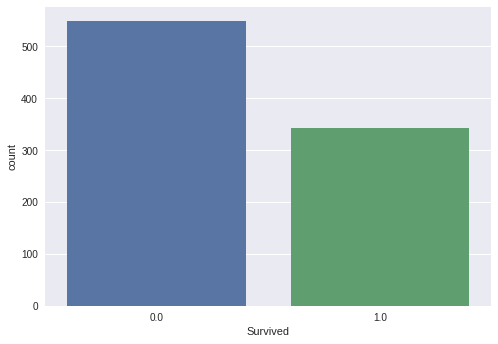

In [0]:
sns.countplot(target,data = df_source)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


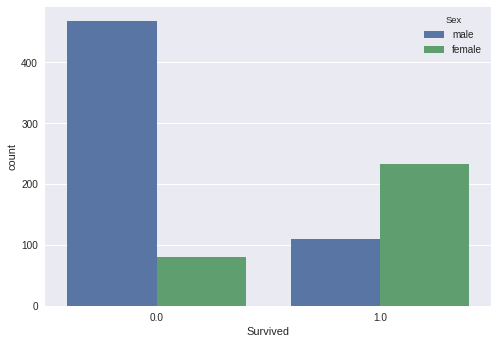

In [0]:
sns.countplot(target ,hue = v1,data = df_source)

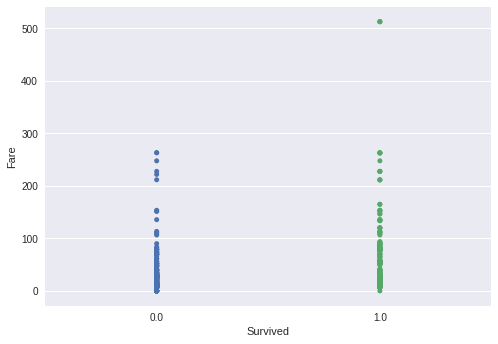

In [0]:
sns.stripplot(df_source[target],df_source[v3])

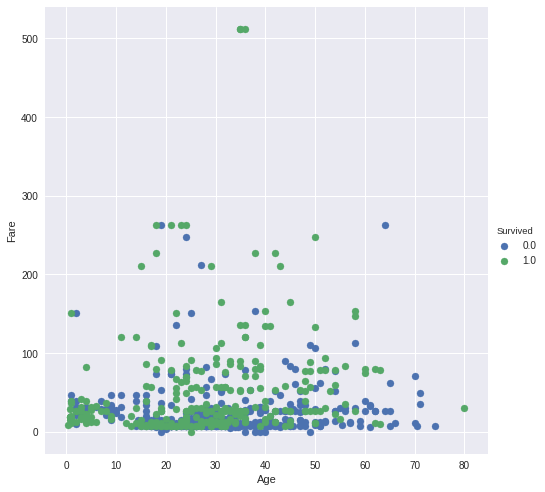

In [0]:
g = sns.FacetGrid(df_source , hue = target ,size = 7)
g.map(plt.scatter,v2,v3).add_legend()

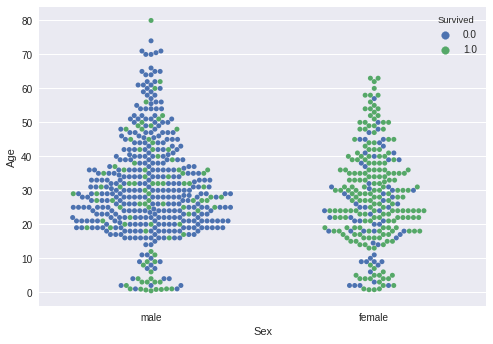

In [0]:
sns.swarmplot(x =v1,y = v2 ,hue = target, data = df_source)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


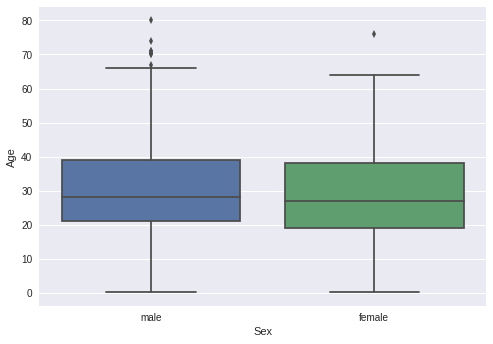

In [0]:
sns.boxplot(x = v1 ,y=v2,data = df_source)

# 欠損値処理

In [0]:
import missingno as msno

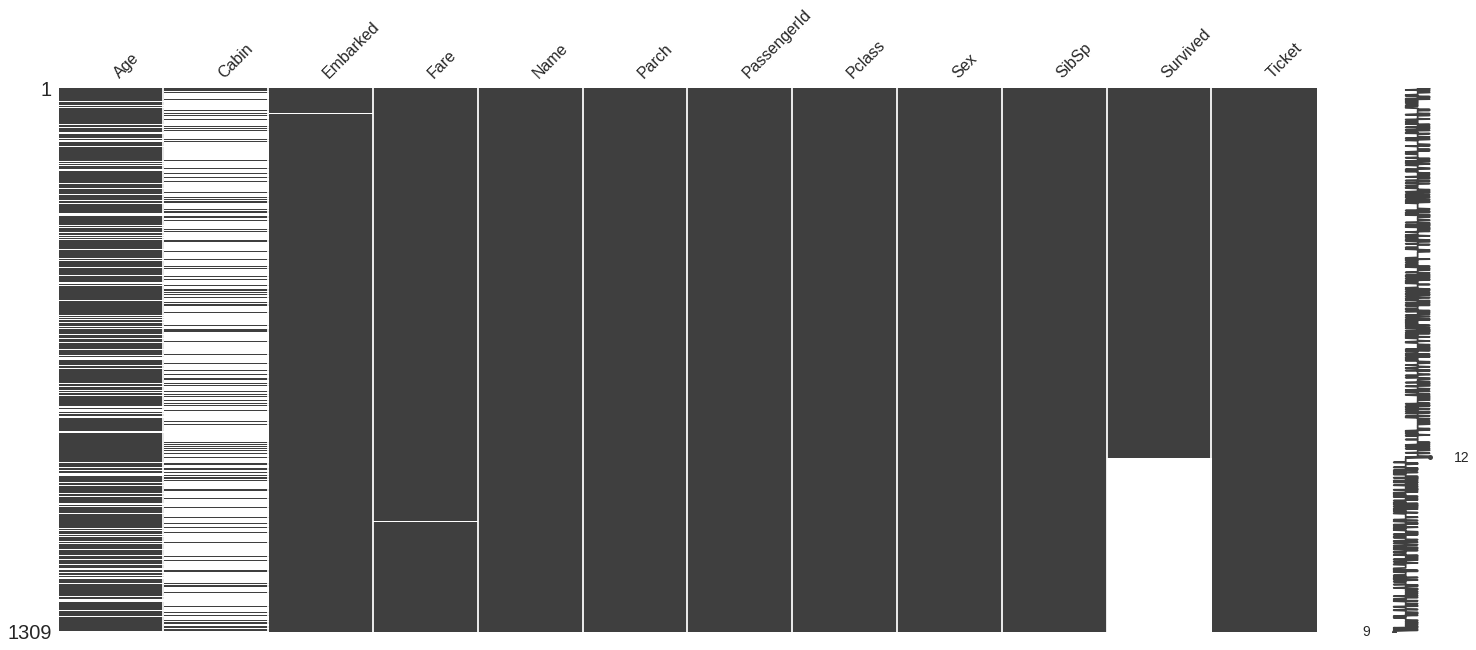

In [0]:
# 欠損値の可視化
msno.matrix(df_source)

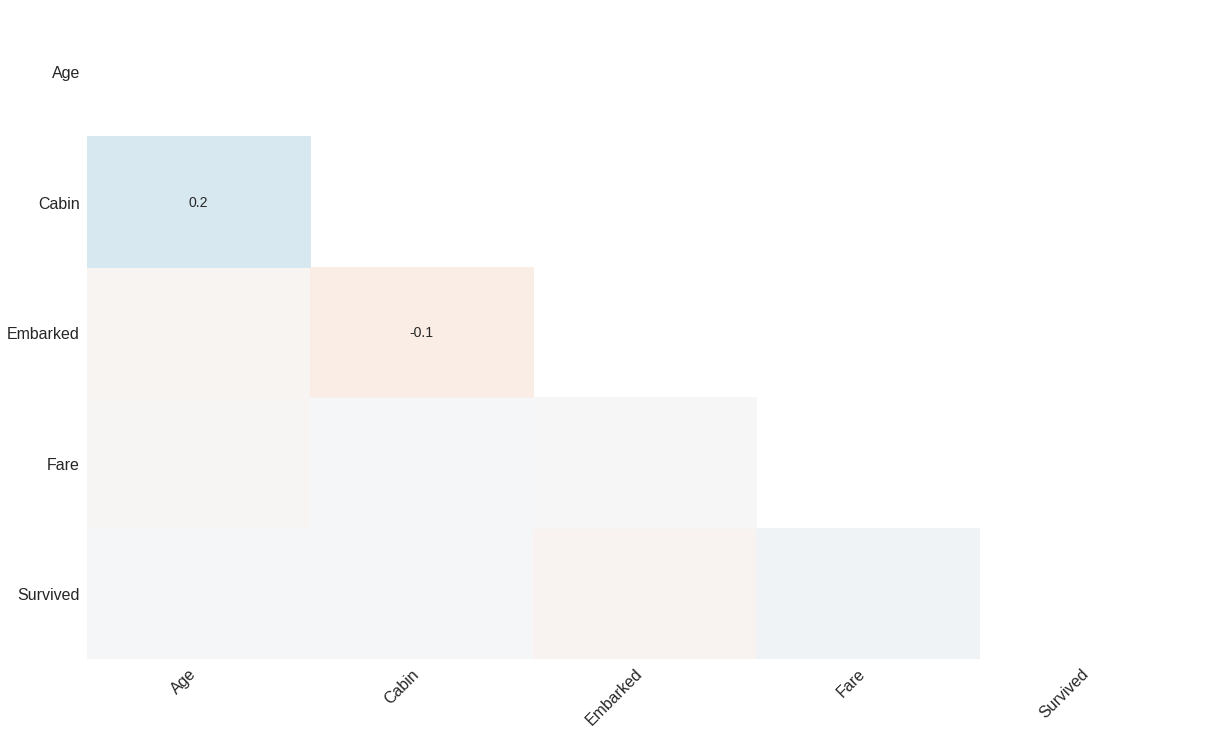

In [0]:
# 各列の欠損値の発生箇所の相関
msno.heatmap(df_source)

In [0]:
df_source.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'], dtype=object)

In [0]:
df_source['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [0]:
df_source = df_source[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [0]:
# # 年齢の欠損値があるデータに年齢の中央値を入れる
# df_source.loc[:,['Age']] = df_source.loc[:,['Age']].fillna(df_source.loc[:,['Age']].median())
# df_source['Embarked'] = df_source.dropna(subset=['Embarked'])

In [0]:
df_source = pd.get_dummies(df_source,drop_first=True)

In [0]:
df_train = df_source[:len(df_train)]
df_sub = df_source[len(df_train):]

In [231]:
df_sub.shape

(418, 194)

In [0]:
# データの分割
target_column_name = 'Survived'
# データの分割
from sklearn.model_selection import train_test_split

## trainとtestデータのデフォルト数が均等に成るように設定
df_train , df_test = train_test_split(df_train ,test_size = 0.2, stratify=df_train[target_column_name],random_state = 0)


X_train = df_train.drop(df_train.select_dtypes(include = object),axis = 1)
X_train = df_train.drop(target_column_name,axis = 1)
y_train = df_train[target_column_name]

X_test = df_test.drop(df_test.select_dtypes(include = object),axis = 1)
X_test = df_test.drop(target_column_name,axis = 1)
y_test = df_test[target_column_name]


# 提出用ファイル
df_sub = df_sub.drop(df_sub.select_dtypes(include = object),axis = 1)
df_sub = df_sub.drop(target_column_name,axis = 1)


# XGBoost

In [0]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (roc_curve, auc, accuracy_score)

In [234]:
print('\n# Survived rate')
print('train: size:{} ,default {} , rate {:f}'.format(
y_train.size,
np.count_nonzero(y_train),
np.count_nonzero(y_train) / y_train.size))

print('test : size: {} , default {}, rate {:f}'.format(
y_test.size,
np.count_nonzero(y_test),
np.count_nonzero(y_test) / y_test.size))

weight = df_source.shape[0] / np.count_nonzero(df_source[target_column_name])

# Grid Search
parameters = {'max_depth': [3, 4, 5, 6,7],
            'min_child_weight': [0.5, 0.8, 1, 2, 3],
            'n_estimators': [50, 100, 200, 300, 500],
            'subsample': [0.8, 0.95, 1],
            'colsample_bytree': [1.0],
    }
clf_xgb = GridSearchCV(xgb.XGBClassifier(random_state = 0), parameters,scoring ='accuracy',cv =2 ,n_jobs = -1)
clf_xgb = clf_xgb.fit(X_train ,y_train)
pred_xgb = clf_xgb.predict(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pred_xgb, pos_label=1)
print('AUC:',auc(fpr_xgb, tpr_xgb))
print('正解率:',accuracy_score(pred_xgb, y_test))
print("Best Parameter: {}".format(clf_xgb.best_params_))


# Survived rate
train: size:712 ,default 273 , rate 0.383427
test : size: 179 , default 69, rate 0.385475
AUC: 0.7725296442687748
正解率: 0.8100558659217877
Best Parameter: {'colsample_bytree': 1.0, 'max_depth': 3, 'min_child_weight': 0.5, 'n_estimators': 50, 'subsample': 0.95}


In [0]:
# LightGBM

In [0]:
import lightgbm as lgb

In [260]:
print('\n# Survived rate')
print('train: size:{} ,default {} , rate {:f}'.format(
y_train.size,
np.count_nonzero(y_train),
np.count_nonzero(y_train) / y_train.size))

print('test : size: {} , default {}, rate {:f}'.format(
y_test.size,
np.count_nonzero(y_test),
np.count_nonzero(y_test) / y_test.size))

weight = df_source.shape[0] / np.count_nonzero(df_source[target_column_name])

# Grid Search
parameters = {'max_depth': [3, 4, 5, 6,7],
            'min_child_weight': [0.5, 0.8, 1, 2, 3],
            'n_estimators': [50, 100, 200, 300, 500],
            'subsample': [0.8, 0.95, 1],
            'colsample_bytree': [1.0],
    }
clf_lgbm = GridSearchCV(lgb.LGBMClassifier(random_state = 0), parameters,scoring ='accuracy',cv = 5 ,n_jobs = -1)
clf_lgbm = clf_lgbm.fit(X_train ,y_train)
pred_lgbm = clf_lgbm.predict(X_test)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, pred_lgbm, pos_label=1)
print('AUC:',auc(fpr_lgbm, tpr_lgbm))
print('正解率:',accuracy_score(pred_lgbm, y_test))
print("Best Parameter: {}".format(clf_lgbm.best_params_))


# Survived rate
train: size:712 ,default 273 , rate 0.383427
test : size: 179 , default 69, rate 0.385475
AUC: 0.7860342555994729
正解率: 0.8100558659217877
Best Parameter: {'colsample_bytree': 1.0, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.8}


# Random Forest

In [0]:
# # 欠損値処理　※以降のモデルは欠損値処理が必要なため
# # 年齢の欠損値があるデータに年齢の中央値を入れる
# df_source_misdel = df_source
# df_source_misdel.loc[:,['Age']] = df_source.loc[:,['Age']].fillna(df_source.loc[:,['Age']].median())

# # df_source['Embarked'] = df_source.dropna(subset=['Embarked'])

In [0]:
# df_source_misdel.isnull().sum()

In [0]:
# # データの分割
# target_column_name = 'Survived'
# # データの分割

# ## trainとtestデータのデフォルト数が均等に成るように設定
# df_train , df_test = train_test_split(df_source_misdel ,test_size = 0.2, stratify=df_source_misdel[target_column_name],random_state = 0)


# X_train = df_train.drop(df_train.select_dtypes(include = object),axis = 1)
# X_train = df_train.drop(target_column_name,axis = 1)
# y_train = df_train[target_column_name]

# X_test = df_test.drop(df_test.select_dtypes(include = object),axis = 1)
# X_test = df_test.drop(target_column_name,axis = 1)
# y_test = df_test[target_column_name]

In [0]:
# from sklearn.ensemble import RandomForestClassifier

In [0]:
# print('\n# Survived rate')
# print('train: size:{} ,default {} , rate {:f}'.format(
# y_train.size,
# np.count_nonzero(y_train),
# np.count_nonzero(y_train) / y_train.size))

# print('test : size: {} , default {}, rate {:f}'.format(
# y_test.size,
# np.count_nonzero(y_test),
# np.count_nonzero(y_test) / y_test.size))

# weight = df_source.shape[0] / np.count_nonzero(df_source[target_column_name])

# # Grid Search
# parameters = {'max_depth': [3, 4, 5, 6,7],
#             'min_child_weight': [0.5, 0.8, 1, 2, 3],
#             'n_estimators': [50, 100, 200, 300, 500],
#             'subsample': [0.8, 0.95, 1],
#             'colsample_bytree': [1.0],
#     }


# clf_rf = RandomForestClassifier(random_state = 0)
# clf_rf = clf_rf.fit(X_train , y_train)
# pred_rf = clf_rf.predict(X_test)
# fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test, pred_rf,pos_label =1)
# print('AUC:' , auc(fpr_rf,tpr_rf))
# print('正解率:',accuracy_score(pred_rf,y_test))

In [0]:
# features = X_train.columns
# importances = clf_rf.feature_importances_
# indices = np.argsort(importances)

# plt.barh(range(len(indices)), importances[indices])
# plt.yticks(range(len(indices)), features[indices])
# plt.show()

In [0]:
# # Grid Search
# parameters = {
#     'n_estimators':[i for i in range(10,100,10)],
#     'criterion':['gini','entropy'],
#     'max_depth':[i for i in range(1,10,1)],
#     'min_samples_split':[2,4,10,12,16]
# }

# clf_rf = GridSearchCV(RandomForestClassifier(random_state = 0), parameters,scoring ='accuracy',cv = 5 ,n_jobs = -1)
# clf_rf = clf_rf.fit(X_train ,y_train)
# pred_rf = clf_rf.predict(X_test)
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, pred_rf, pos_label=1)
# print('AUC:',auc(fpr_rf, tpr_rf))
# print('正解率:',accuracy_score(pred_rf, y_test))
# print("Best Parameter: {}".format(clf_rf.best_params_))

# submitファイル提出

In [0]:
# 提出用ファイルを予測
pred_xgb = clf_xgb.predict(df_sub)

In [0]:
sub = pd.DataFrame(pd.read_csv("input/test.csv")['PassengerId'])
sub['Survived'] = list(map(int, pred_xgb))
sub.to_csv("submission.csv", index = False)

In [252]:
sub.head()
print(sub.shape)

(418, 2)


In [256]:
# submit the file to kaggle
!kaggle competitions submit -c titanic -f submission.csv -m test

100% 2.77k/2.77k [00:02<00:00, 1.06kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [0]:
# Light GBMでも提出
pred_lgbm = clf_lgbm.predict(df_sub)

In [0]:
sub = pd.DataFrame(pd.read_csv('input/test.csv')['PassengerId'])
sub['Survived'] = list(map(int,pred_lgbm))
sub.to_csv('submission_lgbm_0407.csv', index = False)

In [268]:
# submit the file to kaggle
!kaggle competitions submit -c titanic -f submission_lgbm_0407.csv -m lgbm

100% 2.77k/2.77k [00:02<00:00, 1.20kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster